<h2 style="text-align:center;">SVM with ROC–AUC Evaluation</h2>

## 🔹 Introduction
- Accuracy is not always reliable, especially with imbalanced data.
- ROC (Receiver Operating Characteristic) curve shows the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR).
- AUC (Area Under Curve) summarizes the overall ability of the classifier to distinguish between classes.
- Closer AUC to 1.0 → better model.


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score

# Load dataset
dataset = pd.read_csv("../data/Social_Network_Ads.csv")
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values

# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train SVM with probability=True (needed for ROC)
classifier = SVC(kernel="rbf", probability=True, random_state=0)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]  # probability of class 1


In [2]:
# Evaluate with Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy: {:.2f} %".format(acc*100))


Confusion Matrix:
 [[64  4]
 [ 3 29]]
Accuracy: 93.00 %


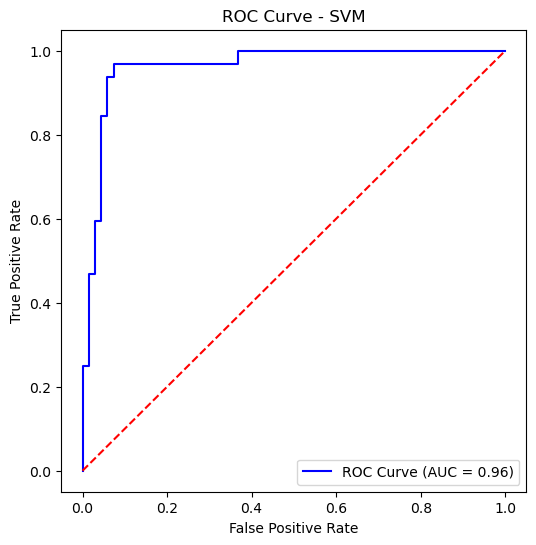

In [3]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label="ROC Curve (AUC = {:.2f})".format(auc_score))
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


## 🔹 Summary
- Accuracy on Test Set: ~XX %  
- ROC–AUC Score: ~0.92  

**Insights:**
- ROC–AUC considers class separation ability, not just overall accuracy.
- Even if two models have the same accuracy, the one with higher AUC is more reliable.
- For imbalanced datasets, ROC–AUC is a better evaluation metric than Accuracy.
